A crash course on NumPy for images
==================================
Source: https://scikit-image.org/docs/dev/user_guide/numpy_images.html

Images in ``scikit-image`` are represented by NumPy ndarrays. Hence, many 
common operations can be achieved using standard NumPy methods for 
manipulating arrays::

In [1]:
import numpy as np
from skimage import data, io
from matplotlib import pyplot as plt
%matplotlib inline
camera = data.camera()
type(camera)

numpy.ndarray

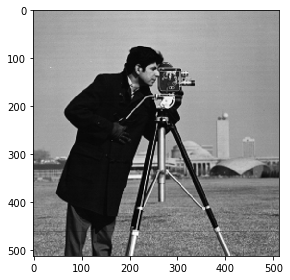

In [2]:
io.imshow(camera);
# plt.show()

Retrieving the geometry of the image and the number of pixels::

In [3]:
print(camera.shape)
print(camera.size)

(512, 512)
262144


Retrieving statistical information about image intensity values::

In [4]:
camera.min(), camera.max()

(0, 255)

In [5]:
camera.mean()

118.31400299072266

NumPy arrays representing images can be of different integer or float
numerical types. See :ref:`data_types` for more information about these
types and how ``scikit-image`` treats them.

NumPy indexing
--------------

NumPy indexing can be used both for looking at the pixel values and to
modify them::

In [6]:
# Get the value of the pixel at the 10th row and 20th column
camera[10, 20]

153

In [7]:
camera[3, 10]

160

In [8]:
# Set to black the pixel at the 3rd row and 10th column
camera[3, 10] = 0

In [9]:
camera[3, 10]

0

Be careful! In NumPy indexing, the first dimension (``camera.shape[0]``)
corresponds to rows, while the second (``camera.shape[1]``) corresponds
to columns, with the origin (``camera[0, 0]``) at the top-left corner.
This matches matrix/linear algebra notation, but is in contrast to
Cartesian (x, y) coordinates. See `Coordinate conventions`_ below for
more details.

Beyond individual pixels, it is possible to access/modify values of
whole sets of pixels using the different indexing capabilities of NumPy.

Slicing::

In [10]:
# Set the first ten lines to "black" (0)
camera[:10] = 0

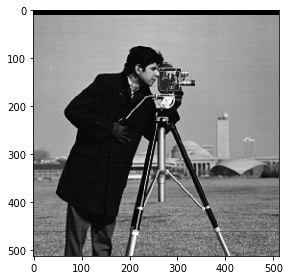

In [11]:
io.imshow(camera);

Masking (indexing with masks of booleans)::

In [12]:
mask = camera < 87
# Set to "white" (255) the pixels where mask is True
camera[mask] = 255

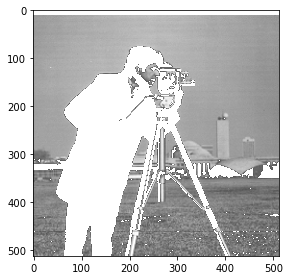

In [13]:
io.imshow(camera);

Fancy indexing (indexing with sets of indices)::

In [14]:
inds_r = np.arange(len(camera))
inds_c = 4 * inds_r % len(camera)
camera[inds_r, inds_c] = 0

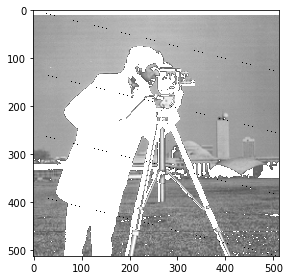

In [15]:
io.imshow(camera);

Masks are very useful when you need to select a set of pixels on which
to perform the manipulations. The mask can be any boolean array
of the same shape as the image (or a shape broadcastable to the image shape).
This can be used to define a region of interest, for example, a disk::

In [16]:
nrows, ncols = camera.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (nrows / 2)**2)
camera[outer_disk_mask] = 0

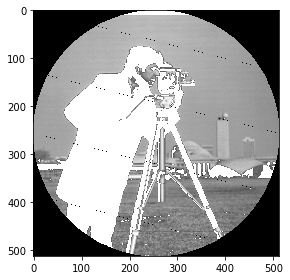

In [17]:
io.imshow(camera);

Boolean operations from NumPy can be used to define even more complex masks::

In [18]:
lower_half = row > cnt_row
lower_half_disk = np.logical_and(lower_half, outer_disk_mask)
camera = data.camera()
camera[lower_half_disk] = 0

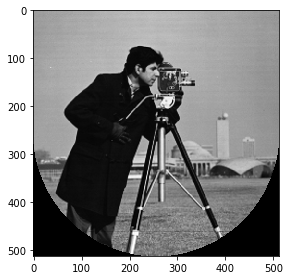

In [19]:
io.imshow(camera);

Color images
------------

All of the above remains true for color images. A color image is a
NumPy array with an additional trailing dimension for the channels::

In [20]:
cat = data.chelsea()
print(type(cat))
print(cat.shape)

<class 'numpy.ndarray'>
(300, 451, 3)


This shows that ``cat`` is a 300-by-451 pixel image with three channels
(red, green, and blue). As before, we can get and set the pixel values::

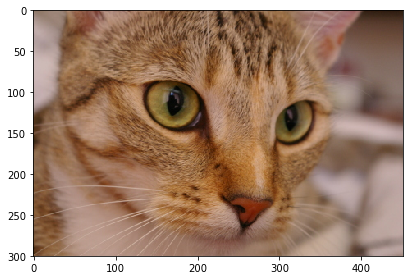

In [21]:
io.imshow(cat);

In [22]:
cat[10, 20]
# Set the pixel at (50th row, 60th column) to "black"
cat[50, 60] = 0
# set the pixel at (50th row, 61st column) to "green"
cat[50, 61] = [0, 255, 0]  # [red, green, blue]

We can also use 2D boolean masks for 2D multichannel images, as we did with
the grayscale image above::

Using a 2D mask on a 2D color image

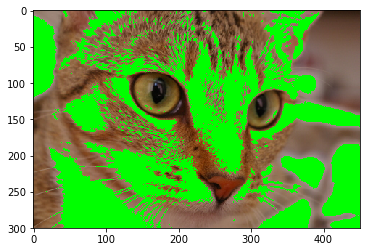

In [23]:
cat = data.chelsea()
reddish = cat[:, :, 0] > 160
cat[reddish] = [0, 255, 0]
plt.imshow(cat) # Another way!

### Gaussian Process

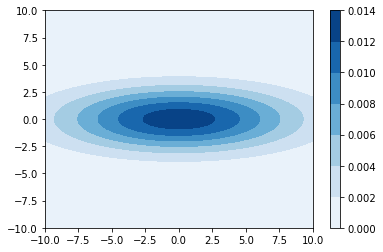

In [24]:
size = 100
sigma_x = 6.
sigma_y = 2.

x = np.linspace(-10, 10, size)
y = np.linspace(-10, 10, size)

x, y = np.meshgrid(x, y)
z = (1/(2*np.pi*sigma_x*sigma_y) * np.exp(-(x**2/(2*sigma_x**2)
     + y**2/(2*sigma_y**2))))

plt.contourf(x, y, z, cmap='Blues')
plt.colorbar()
plt.show()

2D Gaussian-like array:


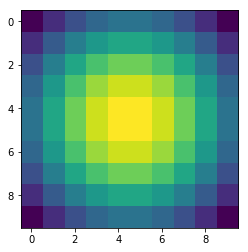

In [26]:
x, y = np.meshgrid(np.linspace(-1,1,10), np.linspace(-1,1,10))
d = np.sqrt(x*x+y*y)
sigma, mu = 1.0, 0.0
g = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )
print("2D Gaussian-like array:")
plt.imshow(g)